<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/5_Linear_regression/5_4_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 5: Linear regression

# Regression Quality Metrics

In this Section we describe simple metrics for judging the quality of a trained regression model, as well as how to make predictions using one.

In [1]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone images
    if not Path('chapter_5_images').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/5_Linear_regression/chapter_5_images
    else:
        print('chapter_5_images already cloned!')

# append path for local library, data, and image import
import sys
sys.path.append('./chapter_5_images') 

# image paths
image_path_1 = 'chapter_5_images/Fig_3_5_new.png'

# standard imports
from IPython.display import Image, HTML

%load_ext autoreload
%autoreload 2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=23f54efaa158318102c832e10ac8d9368050891ec442bb5bf6119ea5fd2812cf
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
Cloning into 'chapter_5_images'...
done.


## Making predictions using a trained model

If we denote the optimal set of weights found by minimizing a regression cost function by $\mathbf{w}^{\star}$ then note we can write our fully tuned linear model as 

\begin{equation}
\text{model}\left(\mathbf{x},\mathbf{w}^{\star}\right) =  \mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\star}   = w_0^{\star} + x_{1}^{\,}w_1^{\star} + x_{2}^{\,}w_2^{\star} + \cdots + x_{N}^{\,}w_N^{\star}.
\end{equation}

Regardless of how we determine optimal parameters $\mathbf{w}^{\star}$, by minimizing a regression cost like the Least Squares or Least Absolute Deviations, we make predictions employing our linear model in the same way.  That is, given an input (whether one from our training dataset or a new input) $\mathbf{x}_{\,}$ we predict its output $y_{\,}$ by passing it along with our trained weigths into our model as 

\begin{equation}
\text{model}\left(\mathbf{x}_{\,},\mathbf{w}^{\star}\right)  = y_{\,}
\end{equation}

This is illustrated pictorially on a prototypical linear regression dataset for the case when $N=1$ in the Figure below.  

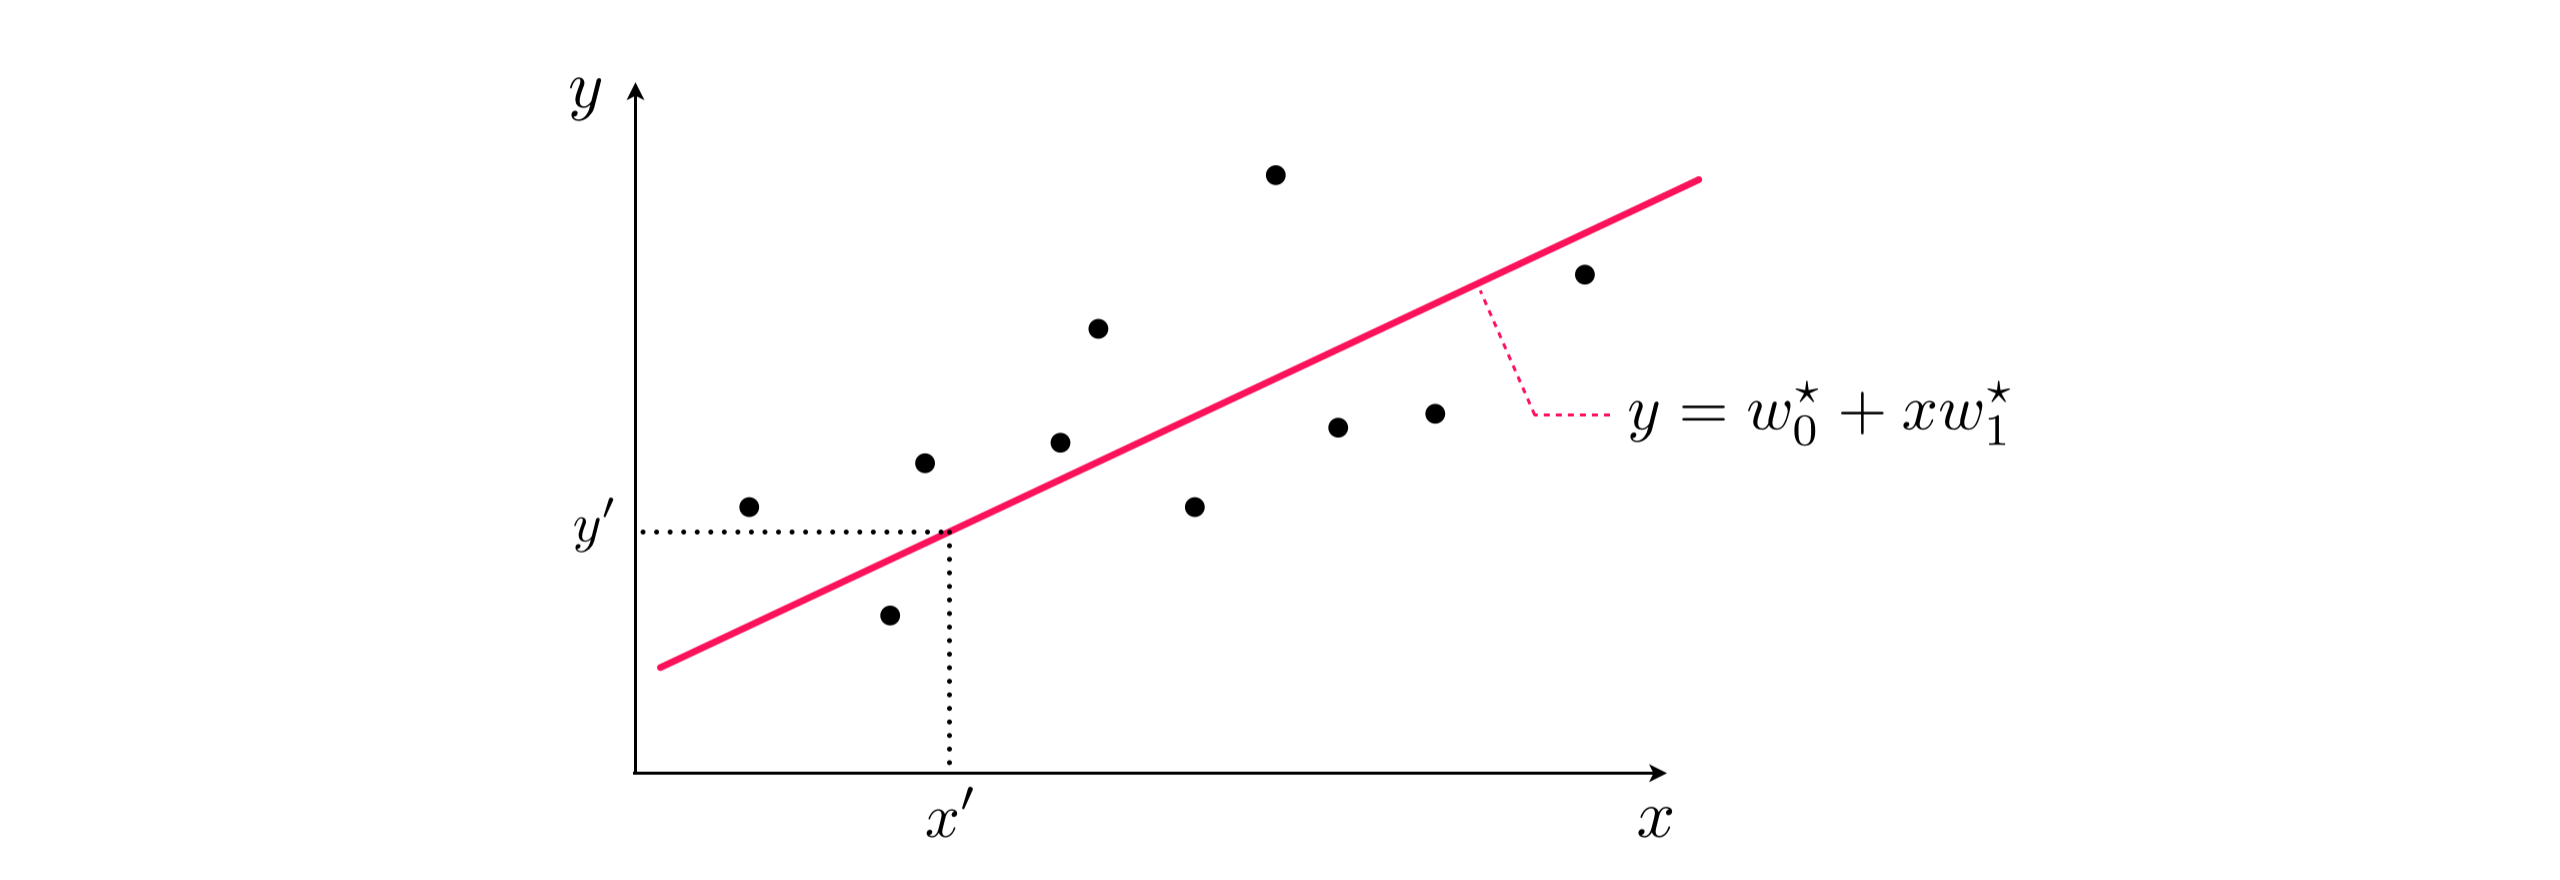

In [3]:
Image(image_path_1, width=800)

<figure>
<figcaption>   
<strong>Figure 4:</strong> <em>  Once a line/hyperplane
has been fit to a dataset via minimizing an appropriate cost function
it may be used to predict the output value of any input. Here a
line has been fit to a two dimensional dataset in this manner, giving
optimal parameters $w_0^{\star}$ and $w_1^{\star}$, and the output value
of a new point $x^{\prime}$ is made using the learned linear
model as $w_0^{\star}+x^{\prime}w_1^{\star} = y^{\prime}$. </em>  </figcaption> 
</figure>

## Judging the quality of a trained model

Once we have successfully minimized the a cost function for linear regression it is an easy matter to determine the quality of our regression model: we simply evaluate a cost function using our optimal weights.  

We can then evalaute the quality of this trained model using a Least Squares cost - which is especially natural to use when we employ this cost in training.  To do this we plug in our trained model and dataset into the Least Squares cost - giving the *Mean Squared Error* (or *MSE* for short) of our trained model

\begin{equation}
\text{MSE}=\frac{1}{P}\sum_{p=1}^{P}\left(\text{model}\left(\mathbf{x}_p,\mathbf{w}^{\star}\right) -y_{p}^{\,}\right)^{2}.
\end{equation}

The name for this quality measurement describes precisely what the Least Squares cost computes - the average (or *mean*) squared error.  

In the same way we can employ the Least Absolute Deviations cost to determine the quality of our trained model.  Plugging in our trained model and dataset into this cost computes the Mean Absolute Deviations (or *MAD* for short) which is precisely what this cost function computes

\begin{equation}
\text{MAD}=\frac{1}{P}\sum_{p=1}^{P}\left\vert\text{model}\left(\mathbf{x}_p,\mathbf{w}^{\star}\right) -y_{p}^{\,}\right\vert.
\end{equation}

These two measurements differ in precisely the ways we have seen their respective cost functions differ - e.g., the MSE measure is far more sensitive to *outliers*.  Which measure one employs in practice can therefore depend on personal and/or occupational preference, or the nature of a problem at hand.

Of course in general the *lower* one can make a quality measures, by proper tuning of model weights, the *better* the quality of the corresponding trained model (and vice versa).  However the threshold for what one considers 'good' or 'great'  performance can depend on personal preference, an occupational or institutionally set benchmark, or some other problem-dependent concern.